In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from networkx.drawing.nx_pydot import write_dot
from networkx.linalg.graphmatrix import *
from networkx.algorithms.approximation import *
#from networkx.centrality import closn
from networkx.algorithms import *
import gc
gc.collect()


21

In [2]:
#input = pd.read_csv("/home/abhishek/Graph/titanic.csv")
input = pd.read_csv("/home/abhishek/Graph/iris.csv")

In [5]:
# drop un-used column
#del input['Name']
#del input['ID']  
del input['species']

In [6]:
total_rows=len(input.axes[0])
total_cols=len(input.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print("Max of connection in graph: "+str(total_rows*total_cols))
input.describe()

Number of Rows: 150
Number of Columns: 4
Max of connection in graph: 600


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#input(input)
input.head(5) 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#input = Survived_0
input.shape

(150, 4)

In [9]:
'''input['Age_prect_10'] = pd.qcut(input['Age'], q=4)
input['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))

input['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)
input['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))

input.loc[input['Sex'] == 'male', 'sex'] = '1'
input.loc[input['Sex'] == 'female', 'sex'] = '0'
#input.head(5)'''

"input['Age_prect_10'] = pd.qcut(input['Age'], q=4)\ninput['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))\n\ninput['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)\ninput['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))\n\ninput.loc[input['Sex'] == 'male', 'sex'] = '1'\ninput.loc[input['Sex'] == 'female', 'sex'] = '0'\n#input.head(5)"

In [11]:
#drop un-use column
'''del input['Fare']
del input['Age'] 
del input['Age_prect_10'] 
del input['Fare_prect_10'] 
del input['Sex']''' 
input.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
input.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [13]:
def create_graph_data(input):
    another_input_list = []
    count = 0
    for i in range(len(input.axes[1])-1): #range(len(input.axes[1])-1)
        if len(input.axes[1]) > i :
            current_col = input.axes[1][i]
            next_col = input.axes[1][i+1]

            for j in range(len(input.axes[0])):
                item = str(input.axes[1][i])+'_'+str(input[current_col][j]),str(input.axes[1][i+1])+'_'+str(input[next_col][j]),input[next_col][j]
                another_input_list.append(item)
                count = count + j
            #
            #print(next_col,len(input.axes[1]),i,j)
        else:
            print("end")

    #print('number of combination of edge (%d)' % (count))
    
    return another_input_list

In [14]:
def graph_create(another_input_list):
    
    MG_1 = nx.DiGraph()
    MG_1.add_weighted_edges_from(another_input_list)
    pos = nx.nx_agraph.graphviz_layout(MG_1)
    nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
    plt.axis("Off")
    plt.show()
    print(MG_1.nodes())
    print('Number of edges',MG_1.number_of_edges())
    print('Number of Nodes',MG_1.number_of_nodes())
    return MG_1

# this code will print nice graph

In [15]:
#### this code will print nice graph
#MG_1 = graph_create(another_input_list)
#nx.nx_agraph.view_pygraphviz(MG_1)

In [16]:
def column_arrange (col_name,edge_impotance_order):
    col_name = list(col_name)
    temp = list(edge_impotance_order)[0].rpartition('_')[0]
    print('High ranked column ---->',temp)
    #print('\nOld column name order\n',col_name)
    col_name.remove(temp)
    col_name.insert(0,temp)
    #print('\nNew column name order\n',col_name)
    
    return list(col_name),temp
    #edge_impotance_order.keys()
    #google_PGR_O = google_matrix(MG_1, alpha=0.9)
    #google_PGR_O

In [17]:
def variable_imp (another_input_list):
    
    ################
    # approach-1    
    ################
    print("\nDiGraph")
    MG_1 = graph_create(another_input_list)
    edge_impotance_weight = {}
    edge_impotance_order = {}
    W=MG_1.edges.data('weight', default=1)
    count = 1
    while (MG_1.number_of_nodes() > 0):
        '''
        pos = nx.nx_agraph.graphviz_layout(MG_1)
        nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
        plt.axis("Off")
        plt.show()
        '''
        PGR_O = nx.pagerank(MG_1, alpha=0.90,max_iter=100, weight=W) 
        # , nstart=W this could be the start value of each node
        #type(PGR_O)
        #print(max(PGR_O.keys()))
        #print(round(max(PGR_O.values()),5))  # maximum rank of the node

        for key, value in PGR_O.items():
            if round(value,5) == round(max(PGR_O.values()),5):
                #print('Edge name -> ',key, '->', round(value,5))
                edge_impotance_weight.update({key:round(value,5)})
                edge_impotance_order.update({key:count})
                MG_1.remove_node(key)
                count = count + 1
                #print('Number of edge',MG_1.number_of_edges(key))

    return edge_impotance_weight,edge_impotance_order

# Run one time with default order of column

In [18]:
# Run one time with default order of column
col_name = input.columns
input = input.reindex(columns=col_name)
input.head(5)
#another_input_list = create_graph_data(input)
#another_input_list[0:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
#another_input_list = create_graph_data(input)

# create graph and node important for data set
#edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)


DiGraph


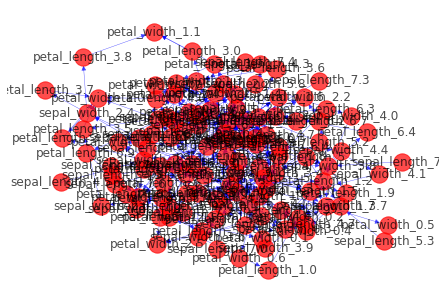

['sepal_length_5.1', 'sepal_width_3.5', 'sepal_length_4.9', 'sepal_width_3.0', 'sepal_length_4.7', 'sepal_width_3.2', 'sepal_length_4.6', 'sepal_width_3.1', 'sepal_length_5.0', 'sepal_width_3.6', 'sepal_length_5.4', 'sepal_width_3.9', 'sepal_width_3.4', 'sepal_length_4.4', 'sepal_width_2.9', 'sepal_width_3.7', 'sepal_length_4.8', 'sepal_length_4.3', 'sepal_length_5.8', 'sepal_width_4.0', 'sepal_length_5.7', 'sepal_width_4.4', 'sepal_width_3.8', 'sepal_width_3.3', 'sepal_length_5.2', 'sepal_width_4.1', 'sepal_length_5.5', 'sepal_width_4.2', 'sepal_length_4.5', 'sepal_width_2.3', 'sepal_length_5.3', 'sepal_length_7.0', 'sepal_length_6.4', 'sepal_length_6.9', 'sepal_length_6.5', 'sepal_width_2.8', 'sepal_length_6.3', 'sepal_width_2.4', 'sepal_length_6.6', 'sepal_width_2.7', 'sepal_width_2.0', 'sepal_length_5.9', 'sepal_length_6.0', 'sepal_width_2.2', 'sepal_length_6.1', 'sepal_length_5.6', 'sepal_length_6.7', 'sepal_length_6.2', 'sepal_width_2.5', 'sepal_length_6.8', 'sepal_width_2.6', 's

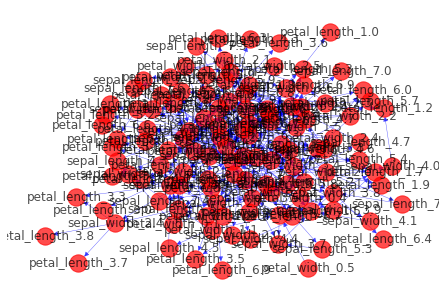

['petal_width_0.2', 'sepal_length_5.1', 'sepal_length_4.9', 'sepal_length_4.7', 'sepal_length_4.6', 'sepal_length_5.0', 'petal_width_0.4', 'sepal_length_5.4', 'petal_width_0.3', 'sepal_length_4.4', 'petal_width_0.1', 'sepal_length_4.8', 'sepal_length_4.3', 'sepal_length_5.8', 'sepal_length_5.7', 'petal_width_0.5', 'sepal_length_5.2', 'sepal_length_5.5', 'sepal_length_4.5', 'petal_width_0.6', 'sepal_length_5.3', 'petal_width_1.4', 'sepal_length_7.0', 'petal_width_1.5', 'sepal_length_6.4', 'sepal_length_6.9', 'petal_width_1.3', 'sepal_length_6.5', 'petal_width_1.6', 'sepal_length_6.3', 'petal_width_1.0', 'sepal_length_6.6', 'sepal_length_5.9', 'sepal_length_6.0', 'sepal_length_6.1', 'sepal_length_5.6', 'sepal_length_6.7', 'sepal_length_6.2', 'petal_width_1.1', 'petal_width_1.8', 'petal_width_1.2', 'sepal_length_6.8', 'petal_width_1.7', 'petal_width_2.5', 'petal_width_1.9', 'petal_width_2.1', 'sepal_length_7.1', 'petal_width_2.2', 'sepal_length_7.6', 'sepal_length_7.3', 'sepal_length_7.2'

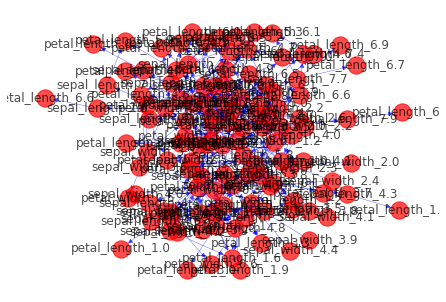

['sepal_width_3.5', 'petal_width_0.2', 'sepal_width_3.0', 'sepal_width_3.2', 'sepal_width_3.1', 'sepal_width_3.6', 'sepal_width_3.9', 'petal_width_0.4', 'sepal_width_3.4', 'petal_width_0.3', 'sepal_width_2.9', 'petal_width_0.1', 'sepal_width_3.7', 'sepal_width_4.0', 'sepal_width_4.4', 'sepal_width_3.8', 'sepal_width_3.3', 'petal_width_0.5', 'sepal_width_4.1', 'sepal_width_4.2', 'sepal_width_2.3', 'petal_width_0.6', 'petal_width_1.4', 'petal_width_1.5', 'petal_width_1.3', 'sepal_width_2.8', 'petal_width_1.6', 'sepal_width_2.4', 'petal_width_1.0', 'sepal_width_2.7', 'sepal_width_2.0', 'sepal_width_2.2', 'sepal_width_2.5', 'petal_width_1.1', 'petal_width_1.8', 'petal_width_1.2', 'petal_width_1.7', 'sepal_width_2.6', 'petal_width_2.5', 'petal_width_1.9', 'petal_width_2.1', 'petal_width_2.2', 'petal_width_2.0', 'petal_width_2.4', 'petal_width_2.3', 'sepal_length_5.1', 'sepal_length_4.9', 'sepal_length_4.7', 'sepal_length_4.6', 'sepal_length_5.0', 'sepal_length_5.4', 'sepal_length_4.4', 'sep

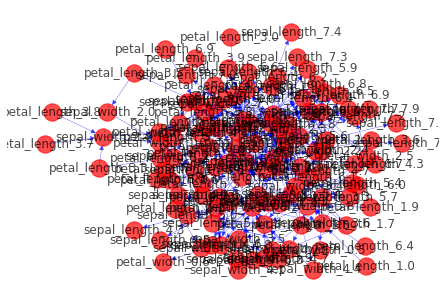

['petal_length_1.4', 'sepal_width_3.5', 'sepal_width_3.0', 'petal_length_1.3', 'sepal_width_3.2', 'petal_length_1.5', 'sepal_width_3.1', 'sepal_width_3.6', 'petal_length_1.7', 'sepal_width_3.9', 'sepal_width_3.4', 'sepal_width_2.9', 'sepal_width_3.7', 'petal_length_1.6', 'petal_length_1.1', 'petal_length_1.2', 'sepal_width_4.0', 'sepal_width_4.4', 'sepal_width_3.8', 'petal_length_1.0', 'sepal_width_3.3', 'petal_length_1.9', 'sepal_width_4.1', 'sepal_width_4.2', 'sepal_width_2.3', 'petal_length_4.7', 'petal_length_4.5', 'petal_length_4.9', 'petal_length_4.0', 'petal_length_4.6', 'sepal_width_2.8', 'petal_length_3.3', 'sepal_width_2.4', 'petal_length_3.9', 'sepal_width_2.7', 'petal_length_3.5', 'sepal_width_2.0', 'petal_length_4.2', 'sepal_width_2.2', 'petal_length_3.6', 'petal_length_4.4', 'petal_length_4.1', 'sepal_width_2.5', 'petal_length_4.8', 'petal_length_4.3', 'petal_length_5.0', 'sepal_width_2.6', 'petal_length_3.8', 'petal_length_3.7', 'petal_length_5.1', 'petal_length_3.0', 'p

In [20]:
col_count = 0
imp_attribute = []
edge_impotance_order_final = {}
while (col_count < len(input.columns)):
    # create graph dataset
    another_input_list = create_graph_data(input)

    # create graph and node important for data set
    edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)

    # make important node as primary node
    col_name,imp = column_arrange(col_name,edge_impotance_order)
    
    imp_attribute.append(imp)
    
    edge_impotance_order_final.update({col_count:edge_impotance_weight})

    #arrange the data set as per new order
    input = input.reindex(columns=col_name)
    #input.head(5)
    col_count = col_count + 1
    #print(col_count)

In [21]:
imp_attribute

['petal_width', 'sepal_width', 'petal_length', 'petal_width']

In [22]:
#

In [30]:
test = pd.DataFrame(edge_impotance_order_final)
type(test)

pandas.core.frame.DataFrame

In [31]:
test.shape

(123, 4)

In [32]:
# convert the index into column
#test.reset_index(level=0, inplace=True)
#test["attribute_name"] = test.index
test

,0,1,2,3
petal_width_0.2,0.03722,0.01639,0.02105,0.03206
petal_width_1.3,0.02863,0.01639,0.03671,0.03482
petal_width_1.0,0.03321,0.01639,0.02059,0.02331
petal_width_0.4,0.02970,0.01639,0.01879,0.02710
petal_width_0.3,0.03745,0.01639,0.03276,0.02850
...,...,...,...,...
petal_length_6.9,0.01408,0.01639,0.02632,0.01515
petal_length_5.7,0.01408,0.01639,0.02119,0.01515
petal_length_6.4,0.01408,0.01639,0.02852,0.01515
petal_length_5.4,0.01408,0.01639,0.02134,0.01515


In [33]:
test.to_csv('/home/abhishek/Graph/iris_output.csv', sep=',', encoding='utf-8')
#pd.DataFrame(test.groupby('sex_1').size().head(10))

In [ ]:
#pd.DataFrame(test.groupby('sex_0').size().head(10))

In [ ]:
#pd.DataFrame(test.groupby('Age_prect_level_4').size().head(10))